# Hypothesis
### More people who have an expected grade of an "A" will have an interest level of either 6 or 7 than 5 or below.

First, the csv will be read and converted into a column-oriented table of data. 

In [11]:
%reload_ext autoreload
%autoreload 2
from data_utils import read_csv_rows, columnar

rows: list[dict[str, str]] = read_csv_rows('../../data/survey.csv')
col_version: dict[str, list[str]] = columnar(rows)

Now, I will only show the interest and grade columns. This will show a chunk of the data, but not all.

In [32]:
from data_utils import head, select
interest: dict[str, list[str]] = select(col_version, ["interested", "grade"])
head(interest, 10)

{'interested': [['7', '7', '7', '5', '4', '6', '6', '5', '5', '5']],
 'grade': [['A', 'B', 'B', 'A', 'A', 'A', 'A', 'C', 'B', 'A']]}

This will turn the list of interest levels into strings either saying true if it is a 6 or 7 and false if it's not.

In [37]:
def t_f(x: list[str]) -> list[str]:
    new_grade: list[str] = []
    for number in x:
        if int(number) > 5:
            new_grade.append("true")
        else:
            new_grade.append("false")
    return new_grade

new_list: list[str] = t_f(col_version["interested"])


This will produce a mask of True if the grade is an A.

In [41]:
from data_utils import list_mask

grade_mask: list[bool] = list_mask(col_version["grade"], "A")

This will filter through the masked list and create new lists that only include data points where the expected grade is A.

In [43]:
from data_utils import list_masked, count

lists_masked: list[str] = list_masked(new_list, grade_mask)

if_A: list[str] = list_masked(col_version["interested"], grade_mask)

print(count(lists_masked))
print(count(if_A))

{'true': 179, 'false': 58}
{'7': 116, '5': 33, '4': 20, '6': 63, '3': 4, '2': 1}


<function matplotlib.pyplot.show(close=None, block=None)>

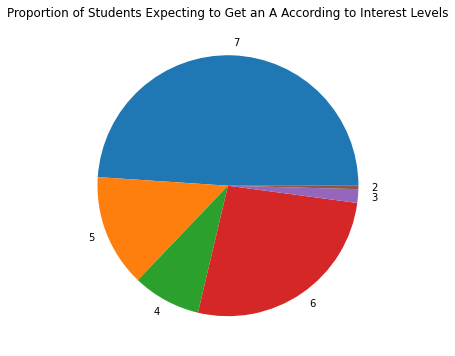

In [1]:
from matplotlib import pyplot as plt 
import numpy as np 

numbs = ["7", "5", "4", "6", "3", "2"]
data = [116, 33, 20, 63, 4, 1]

fig = plt.figure(figsize = (9, 6))
plt.pie(data, labels = numbs)
plt.title("Proportion of Students Expecting to Get an A According to Interest Levels")
plt.show

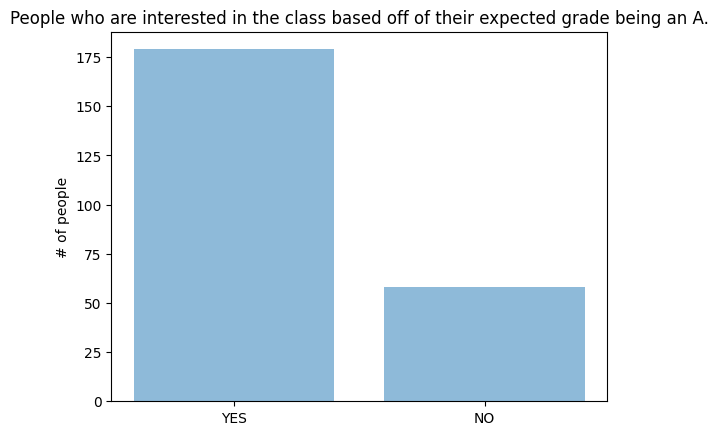

In [49]:
from matplotlib import pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt 
from data_utils import count

##figure, axes = plt.subplots(1)
#axes.bar(count.keys(), count.values())

objects = ("YES", "NO")
y_positioning = np.arange(len(objects))
counts = [179, 58]

plt.bar(y_positioning, counts, align = "center", alpha = 0.5)
plt.xticks(y_positioning, objects)
plt.ylabel("# of people")
plt.title("People who are interested in the class based off of their expected grade being an A.")
plt.show()

## The YES means that the student has an expected grade of A and also has an interest level higher than 5.
## The NO means that the student has an expected grade of an A but does not have an interest level above a 5.

# Conclusion
### There are more people that expect to receive an A in the class and also have interest level higher than 5 than people that do not fit those requirements.